In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [3]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)
SNR_array_1 = []
random_scale = 1700

25 25
wvfrm = 
l =  0  SNR =  16.877822820709408  m1 =  25  m2 =  25
13 24
wvfrm = 
l =  0  SNR =  12.531814688060644  m1 =  13  m2 =  24
11 10
wvfrm = 
l =  0  SNR =  10.236457310947772  m1 =  11  m2 =  10
24 26
wvfrm = 
l =  1  SNR =  19.11312650723503  m1 =  24  m2 =  26
12 23
wvfrm = 
l =  1  SNR =  11.666229818542247  m1 =  12  m2 =  23
10 29
wvfrm = 
l =  1  SNR =  10.903890574980176  m1 =  10  m2 =  29
18 14
wvfrm = 
l =  2  SNR =  12.031377401333874  m1 =  18  m2 =  14
18 18
wvfrm = 
l =  2  SNR =  14.752560736985574  m1 =  18  m2 =  18
11 14
wvfrm = 
l =  2  SNR =  12.109649851705077  m1 =  11  m2 =  14
30 18
wvfrm = 
l =  2  SNR =  17.63959256543391  m1 =  30  m2 =  18
12 24
wvfrm = 
l =  2  SNR =  12.160403440424007  m1 =  12  m2 =  24
12 14
wvfrm = 
l =  2  SNR =  14.239627138260714  m1 =  12  m2 =  14
12 20
wvfrm = 
l =  2  SNR =  11.924567071329406  m1 =  12  m2 =  20
23 22
wvfrm = 
l =  2  SNR =  15.997352372368754  m1 =  23  m2 =  22
24 26
wvfrm = 
l =  2  SNR =  18.316

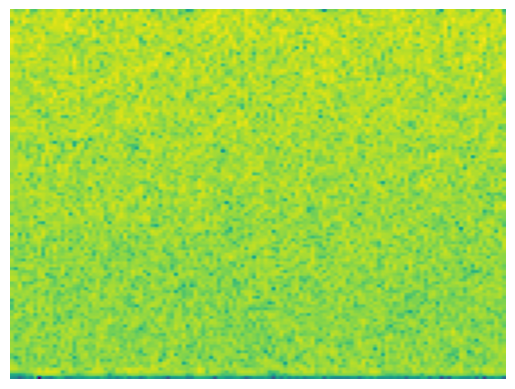

In [4]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 27
wvfrm = 
l =  100  SNR =  16.62049977514225  m1 =  18  m2 =  27
29 28
wvfrm = 
l =  100  SNR =  21.227871482711535  m1 =  29  m2 =  28
22 27
wvfrm = 
l =  100  SNR =  19.746583991636168  m1 =  22  m2 =  27
11 14
wvfrm = 
l =  100  SNR =  12.174876377879938  m1 =  11  m2 =  14
11 19
wvfrm = 
l =  100  SNR =  11.47827428569866  m1 =  11  m2 =  19
27 17
wvfrm = 
l =  100  SNR =  15.130561950929442  m1 =  27  m2 =  17
14 14
wvfrm = 
l =  100  SNR =  11.875273615939498  m1 =  14  m2 =  14
29 23
wvfrm = 
l =  100  SNR =  18.8204056382722  m1 =  29  m2 =  23
15 30
wvfrm = 
l =  100  SNR =  14.87636032094089  m1 =  15  m2 =  30
14 18
wvfrm = 
l =  100  SNR =  12.762132948410075  m1 =  14  m2 =  18
30 28
wvfrm = 
l =  100  SNR =  20.198224572511347  m1 =  30  m2 =  28
30 23
wvfrm = 
l =  100  SNR =  19.290939735976117  m1 =  30  m2 =  23
16 21
wvfrm = 
l =  100  SNR =  13.954918084009366  m1 =  16  m2 =  21
27 23
wvfrm = 
l =  100  SNR =  18.65060224914929  m1 =  27  m2 =  23
10 29
wvfrm 

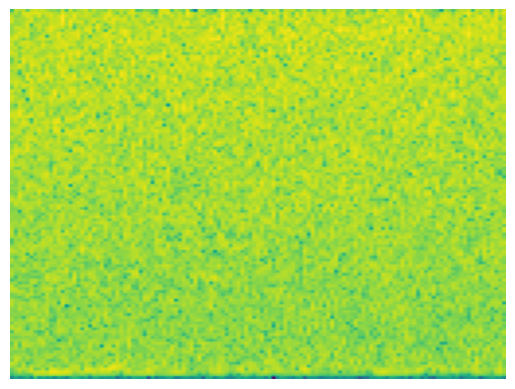

In [5]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 23
wvfrm = 
l =  200  SNR =  12.955166828651153  m1 =  12  m2 =  23
17 27
wvfrm = 
l =  200  SNR =  15.054376115771504  m1 =  17  m2 =  27
28 18
wvfrm = 
l =  200  SNR =  15.943559251986526  m1 =  28  m2 =  18
20 29
wvfrm = 
l =  200  SNR =  17.165134986632918  m1 =  20  m2 =  29
10 21
wvfrm = 
l =  200  SNR =  11.291973487767947  m1 =  10  m2 =  21
12 24
wvfrm = 
l =  200  SNR =  10.70420688799806  m1 =  12  m2 =  24
20 10
wvfrm = 
l =  201  SNR =  11.180496133265656  m1 =  20  m2 =  10
13 10
wvfrm = 
l =  201  SNR =  10.028186573136518  m1 =  13  m2 =  10
22 18
wvfrm = 
l =  202  SNR =  15.318984623018983  m1 =  22  m2 =  18
12 21
wvfrm = 
l =  202  SNR =  12.019035948268382  m1 =  12  m2 =  21
12 29
wvfrm = 
l =  202  SNR =  12.808373298894447  m1 =  12  m2 =  29
20 20
wvfrm = 
l =  202  SNR =  16.39398874297704  m1 =  20  m2 =  20
19 15
wvfrm = 
l =  202  SNR =  13.9895053551584  m1 =  19  m2 =  15
26 30
wvfrm = 
l =  202  SNR =  19.121023034475172  m1 =  26  m2 =  30
27 16
wvfr

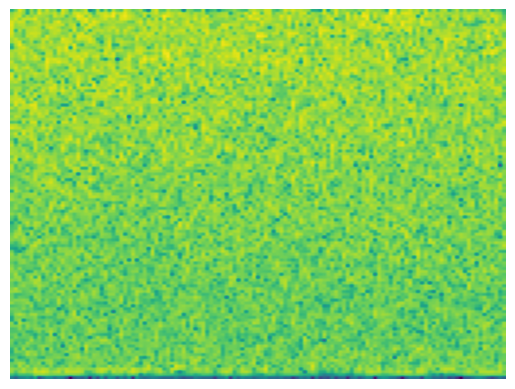

In [6]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 23
wvfrm = 
l =  300  SNR =  16.071694676383313  m1 =  24  m2 =  23
24 10
wvfrm = 
l =  300  SNR =  11.352212954529211  m1 =  24  m2 =  10
10 30
wvfrm = 
l =  300  SNR =  12.141385094088168  m1 =  10  m2 =  30
29 21
wvfrm = 
l =  300  SNR =  17.029981865232635  m1 =  29  m2 =  21
16 10
wvfrm = 
l =  300  SNR =  10.07787573701431  m1 =  16  m2 =  10
25 16
wvfrm = 
l =  301  SNR =  14.120929610183207  m1 =  25  m2 =  16
15 25
wvfrm = 
l =  301  SNR =  14.5615648093991  m1 =  15  m2 =  25
29 23
wvfrm = 
l =  301  SNR =  19.24158181798708  m1 =  29  m2 =  23
13 15
wvfrm = 
l =  301  SNR =  13.208821111886238  m1 =  13  m2 =  15
25 15
wvfrm = 
l =  301  SNR =  14.274058100439802  m1 =  25  m2 =  15
17 16
wvfrm = 
l =  301  SNR =  13.37236804219419  m1 =  17  m2 =  16
14 11
wvfrm = 
l =  301  SNR =  10.200765742140348  m1 =  14  m2 =  11
23 17
wvfrm = 
l =  302  SNR =  15.306157495224566  m1 =  23  m2 =  17
28 25
wvfrm = 
l =  302  SNR =  18.613166177144674  m1 =  28  m2 =  25
13 25
wvfrm

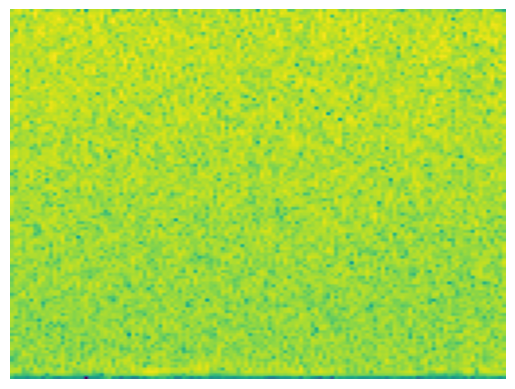

In [7]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 11
wvfrm = 
l =  400  SNR =  13.495465091167539  m1 =  24  m2 =  11
15 11
wvfrm = 
l =  400  SNR =  10.985412610419546  m1 =  15  m2 =  11
17 19
wvfrm = 
l =  401  SNR =  13.574274135531713  m1 =  17  m2 =  19
20 11
wvfrm = 
l =  401  SNR =  14.325875278508775  m1 =  20  m2 =  11
24 11
wvfrm = 
l =  401  SNR =  13.02433387844481  m1 =  24  m2 =  11
17 17
wvfrm = 
l =  401  SNR =  13.787247387719466  m1 =  17  m2 =  17
24 11
wvfrm = 
l =  401  SNR =  12.890172325485494  m1 =  24  m2 =  11
22 13
wvfrm = 
l =  401  SNR =  12.68260646166947  m1 =  22  m2 =  13
20 27
wvfrm = 
l =  401  SNR =  17.34198342853253  m1 =  20  m2 =  27
25 25
wvfrm = 
l =  401  SNR =  18.324404876316173  m1 =  25  m2 =  25
12 21
wvfrm = 
l =  401  SNR =  13.812324387226246  m1 =  12  m2 =  21
23 22
wvfrm = 
l =  401  SNR =  17.012697552281015  m1 =  23  m2 =  22
11 23
wvfrm = 
l =  401  SNR =  11.436237336880833  m1 =  11  m2 =  23
30 10
wvfrm = 
l =  401  SNR =  12.565517004005914  m1 =  30  m2 =  10
11 13
wvf

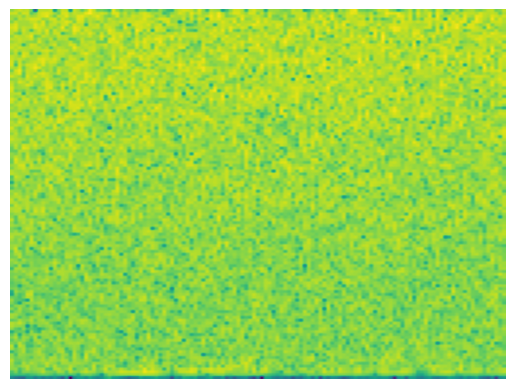

In [8]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 21
wvfrm = 
l =  500  SNR =  19.18470436437943  m1 =  29  m2 =  21
16 13
wvfrm = 
l =  500  SNR =  14.290674778946226  m1 =  16  m2 =  13
10 22
wvfrm = 
l =  500  SNR =  12.662427101167307  m1 =  10  m2 =  22
20 29
wvfrm = 
l =  500  SNR =  16.096651510661744  m1 =  20  m2 =  29
29 10
wvfrm = 
l =  500  SNR =  12.292572953755206  m1 =  29  m2 =  10
29 25
wvfrm = 
l =  500  SNR =  18.616594240320655  m1 =  29  m2 =  25
12 24
wvfrm = 
l =  500  SNR =  13.301794150266248  m1 =  12  m2 =  24
22 25
wvfrm = 
l =  500  SNR =  16.829430448083734  m1 =  22  m2 =  25
26 19
wvfrm = 
l =  500  SNR =  17.079909220105307  m1 =  26  m2 =  19
29 16
wvfrm = 
l =  500  SNR =  16.982391321757998  m1 =  29  m2 =  16
15 21
wvfrm = 
l =  500  SNR =  15.35272709248611  m1 =  15  m2 =  21
19 16
wvfrm = 
l =  500  SNR =  13.890898885636474  m1 =  19  m2 =  16
19 11
wvfrm = 
l =  500  SNR =  10.591109683592581  m1 =  19  m2 =  11
29 15
wvfrm = 
l =  501  SNR =  14.081221903451889  m1 =  29  m2 =  15
21 23
wv

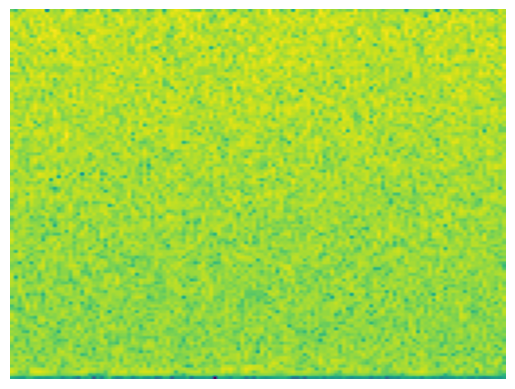

In [10]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 11
wvfrm = 
l =  600  SNR =  10.244619707522325  m1 =  11  m2 =  11
14 29
wvfrm = 
l =  601  SNR =  16.66106725625042  m1 =  14  m2 =  29
13 23
wvfrm = 
l =  601  SNR =  12.521522370515653  m1 =  13  m2 =  23
16 17
wvfrm = 
l =  601  SNR =  14.234775904916974  m1 =  16  m2 =  17
26 19
wvfrm = 
l =  601  SNR =  18.15496423521533  m1 =  26  m2 =  19
24 14
wvfrm = 
l =  601  SNR =  15.613217331622062  m1 =  24  m2 =  14
14 26
wvfrm = 
l =  601  SNR =  15.547045223700819  m1 =  14  m2 =  26
17 20
wvfrm = 
l =  601  SNR =  16.60906898869448  m1 =  17  m2 =  20
17 21
wvfrm = 
l =  601  SNR =  13.730558454159395  m1 =  17  m2 =  21
18 29
wvfrm = 
l =  601  SNR =  17.031893141295306  m1 =  18  m2 =  29
25 28
wvfrm = 
l =  601  SNR =  18.29442531642281  m1 =  25  m2 =  28
10 10
wvfrm = 
l =  601  SNR =  10.620739276646638  m1 =  10  m2 =  10
19 21
wvfrm = 
l =  602  SNR =  15.036504317755824  m1 =  19  m2 =  21
15 22
wvfrm = 
l =  602  SNR =  13.189067539148736  m1 =  15  m2 =  22
16 27
wvfr

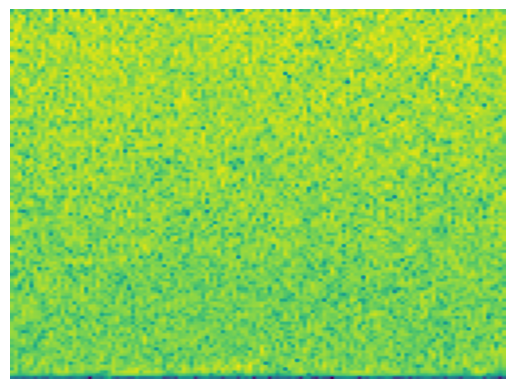

In [11]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 21
wvfrm = 
l =  700  SNR =  11.342082167870574  m1 =  10  m2 =  21
28 23
wvfrm = 
l =  700  SNR =  17.921337110865064  m1 =  28  m2 =  23
23 17
wvfrm = 
l =  700  SNR =  12.74030913719543  m1 =  23  m2 =  17
17 15
wvfrm = 
l =  700  SNR =  12.433331967039159  m1 =  17  m2 =  15
18 16
wvfrm = 
l =  700  SNR =  13.956459366629213  m1 =  18  m2 =  16
22 28
wvfrm = 
l =  700  SNR =  18.769159520178658  m1 =  22  m2 =  28
28 28
wvfrm = 
l =  700  SNR =  20.119729973699688  m1 =  28  m2 =  28
19 30
wvfrm = 
l =  700  SNR =  18.597356795539365  m1 =  19  m2 =  30
13 15
wvfrm = 
l =  700  SNR =  10.856898268993278  m1 =  13  m2 =  15
29 26
wvfrm = 
l =  701  SNR =  21.517003188276725  m1 =  29  m2 =  26
27 10
wvfrm = 
l =  701  SNR =  11.921420978480665  m1 =  27  m2 =  10
21 21
wvfrm = 
l =  701  SNR =  15.699987116370998  m1 =  21  m2 =  21
13 16
wvfrm = 
l =  701  SNR =  12.986736241500395  m1 =  13  m2 =  16
26 18
wvfrm = 
l =  701  SNR =  14.89305460651648  m1 =  26  m2 =  18
15 20
wv

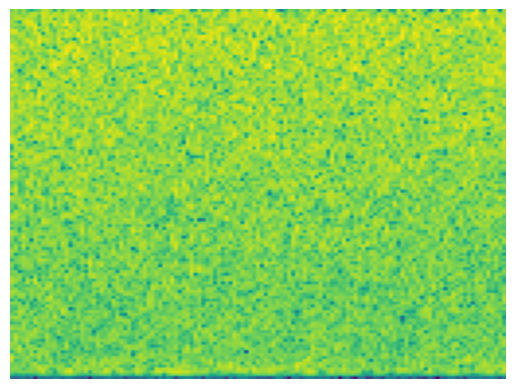

In [12]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 13
wvfrm = 
l =  800  SNR =  11.687633189538484  m1 =  25  m2 =  13
16 20
wvfrm = 
l =  800  SNR =  15.445004160588775  m1 =  16  m2 =  20
17 15
wvfrm = 
l =  800  SNR =  14.935882627229264  m1 =  17  m2 =  15
13 24
wvfrm = 
l =  800  SNR =  12.402302345830828  m1 =  13  m2 =  24
17 11
wvfrm = 
l =  800  SNR =  12.093262979061349  m1 =  17  m2 =  11
14 12
wvfrm = 
l =  800  SNR =  11.834572209698898  m1 =  14  m2 =  12
19 17
wvfrm = 
l =  800  SNR =  13.312273833425005  m1 =  19  m2 =  17
14 15
wvfrm = 
l =  800  SNR =  11.726295589532953  m1 =  14  m2 =  15
15 18
wvfrm = 
l =  800  SNR =  14.977280748996774  m1 =  15  m2 =  18
20 17
wvfrm = 
l =  800  SNR =  13.562225276468052  m1 =  20  m2 =  17
29 24
wvfrm = 
l =  800  SNR =  18.733760190260426  m1 =  29  m2 =  24
23 16
wvfrm = 
l =  800  SNR =  13.142548577844524  m1 =  23  m2 =  16
11 26
wvfrm = 
l =  800  SNR =  13.499116306976374  m1 =  11  m2 =  26
18 14
wvfrm = 
l =  800  SNR =  13.83615490928163  m1 =  18  m2 =  14
21 27
w

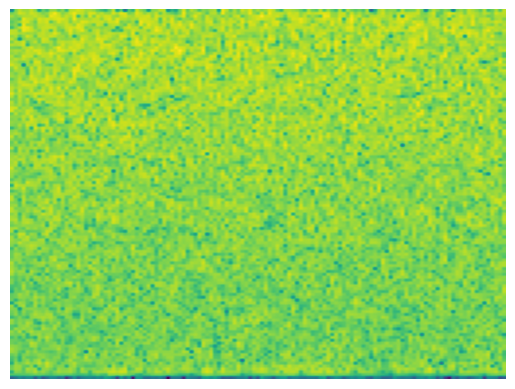

In [13]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 27
wvfrm = 
l =  900  SNR =  17.681895109495265  m1 =  21  m2 =  27
28 12
wvfrm = 
l =  900  SNR =  11.283839522813878  m1 =  28  m2 =  12
28 29
wvfrm = 
l =  900  SNR =  20.029074560414077  m1 =  28  m2 =  29
10 20
wvfrm = 
l =  900  SNR =  11.155113832398436  m1 =  10  m2 =  20
14 21
wvfrm = 
l =  900  SNR =  13.833292606960127  m1 =  14  m2 =  21
23 17
wvfrm = 
l =  900  SNR =  15.071279591644354  m1 =  23  m2 =  17
13 27
wvfrm = 
l =  900  SNR =  13.133228047776518  m1 =  13  m2 =  27
13 22
wvfrm = 
l =  900  SNR =  12.690103771573252  m1 =  13  m2 =  22
18 28
wvfrm = 
l =  900  SNR =  15.609827501266604  m1 =  18  m2 =  28
29 27
wvfrm = 
l =  900  SNR =  19.208398556292497  m1 =  29  m2 =  27
19 20
wvfrm = 
l =  900  SNR =  15.32739374947701  m1 =  19  m2 =  20
27 22
wvfrm = 
l =  900  SNR =  18.693671261000134  m1 =  27  m2 =  22
23 24
wvfrm = 
l =  900  SNR =  17.401519008504028  m1 =  23  m2 =  24
25 24
wvfrm = 
l =  900  SNR =  16.79175246736487  m1 =  25  m2 =  24
26 13
wv

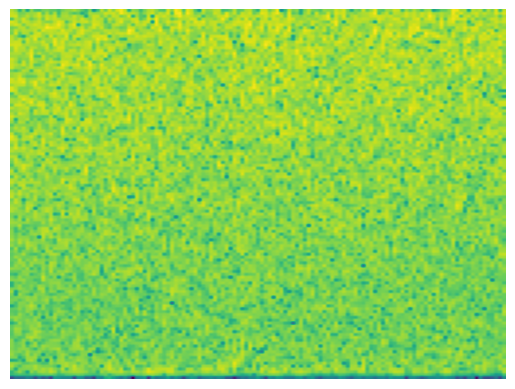

In [14]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

18 11
wvfrm = 
l =  1000  SNR =  10.6520351092259  m1 =  18  m2 =  11
14 25
wvfrm = 
l =  1001  SNR =  14.544950066500661  m1 =  14  m2 =  25
18 20
wvfrm = 
l =  1001  SNR =  14.097614220756205  m1 =  18  m2 =  20
26 17
wvfrm = 
l =  1001  SNR =  14.731412088857645  m1 =  26  m2 =  17
15 18
wvfrm = 
l =  1001  SNR =  15.812124117626  m1 =  15  m2 =  18
10 13
wvfrm = 
l =  1001  SNR =  10.274225010360245  m1 =  10  m2 =  13
18 21
wvfrm = 
l =  1002  SNR =  14.7765313900719  m1 =  18  m2 =  21
27 27
wvfrm = 
l =  1002  SNR =  20.352770047360053  m1 =  27  m2 =  27
20 27
wvfrm = 
l =  1002  SNR =  16.458378655412883  m1 =  20  m2 =  27
22 16
wvfrm = 
l =  1002  SNR =  13.377619035371039  m1 =  22  m2 =  16
28 18
wvfrm = 
l =  1002  SNR =  15.90311187624653  m1 =  28  m2 =  18
26 16
wvfrm = 
l =  1002  SNR =  14.463251799765263  m1 =  26  m2 =  16
20 16
wvfrm = 
l =  1002  SNR =  15.434323472153691  m1 =  20  m2 =  16
24 12
wvfrm = 
l =  1002  SNR =  13.534155902597284  m1 =  24  m2 =  12


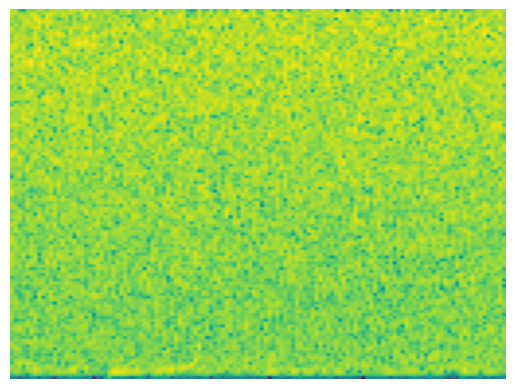

In [15]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 29
wvfrm = 
l =  1100  SNR =  12.184543857118621  m1 =  12  m2 =  29
13 28
wvfrm = 
l =  1100  SNR =  12.80668890737819  m1 =  13  m2 =  28
10 21
wvfrm = 
l =  1100  SNR =  10.472206003904862  m1 =  10  m2 =  21
26 25
wvfrm = 
l =  1101  SNR =  19.7075989731366  m1 =  26  m2 =  25
20 13
wvfrm = 
l =  1101  SNR =  12.14227540372731  m1 =  20  m2 =  13
14 30
wvfrm = 
l =  1101  SNR =  15.312634863723975  m1 =  14  m2 =  30
17 18
wvfrm = 
l =  1101  SNR =  11.332017625307039  m1 =  17  m2 =  18
28 18
wvfrm = 
l =  1101  SNR =  16.41830906361347  m1 =  28  m2 =  18
24 12
wvfrm = 
l =  1101  SNR =  12.55345400561817  m1 =  24  m2 =  12
27 25
wvfrm = 
l =  1101  SNR =  19.604530631503515  m1 =  27  m2 =  25
16 14
wvfrm = 
l =  1101  SNR =  12.868766304947023  m1 =  16  m2 =  14
22 26
wvfrm = 
l =  1101  SNR =  17.05797795082588  m1 =  22  m2 =  26
19 15
wvfrm = 
l =  1101  SNR =  13.007729586855115  m1 =  19  m2 =  15
22 30
wvfrm = 
l =  1101  SNR =  20.186526321460413  m1 =  22  m2 =  30

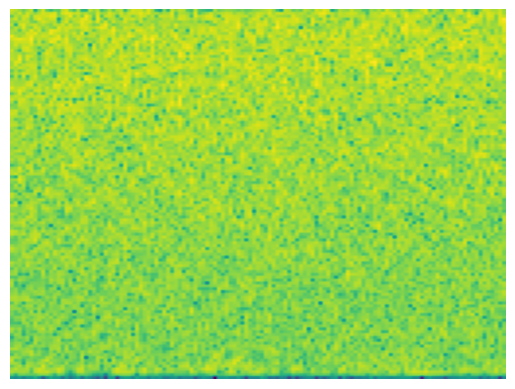

In [16]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 21
wvfrm = 
l =  1200  SNR =  18.027114576475025  m1 =  25  m2 =  21
28 25
wvfrm = 
l =  1200  SNR =  18.96026486831096  m1 =  28  m2 =  25
13 20
wvfrm = 
l =  1200  SNR =  13.06634588683678  m1 =  13  m2 =  20
29 10
wvfrm = 
l =  1200  SNR =  11.020412847585474  m1 =  29  m2 =  10
22 16
wvfrm = 
l =  1200  SNR =  13.791242954676546  m1 =  22  m2 =  16
15 23
wvfrm = 
l =  1200  SNR =  13.801858287190589  m1 =  15  m2 =  23
23 15
wvfrm = 
l =  1200  SNR =  14.974761151211055  m1 =  23  m2 =  15
11 28
wvfrm = 
l =  1200  SNR =  13.277335002868012  m1 =  11  m2 =  28
23 29
wvfrm = 
l =  1200  SNR =  17.652702568194005  m1 =  23  m2 =  29
13 12
wvfrm = 
l =  1200  SNR =  10.913012713158164  m1 =  13  m2 =  12
11 24
wvfrm = 
l =  1201  SNR =  12.746258728404  m1 =  11  m2 =  24
21 17
wvfrm = 
l =  1201  SNR =  14.038635040997024  m1 =  21  m2 =  17
11 10
wvfrm = 
l =  1201  SNR =  8.816664083426906  m1 =  11  m2 =  10
10 20
wvfrm = 
l =  1202  SNR =  10.608697751393965  m1 =  10  m2 =  2

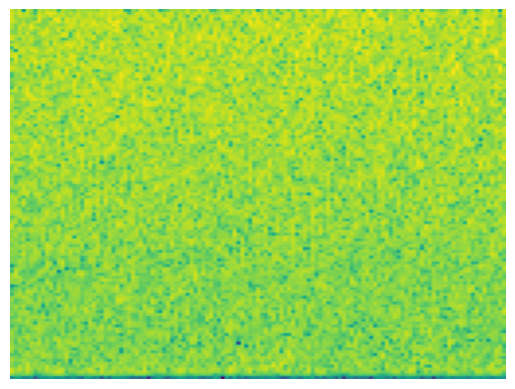

In [17]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 18
wvfrm = 
l =  1300  SNR =  17.453655383556114  m1 =  29  m2 =  18
22 20
wvfrm = 
l =  1300  SNR =  15.42666367190579  m1 =  22  m2 =  20
25 28
wvfrm = 
l =  1300  SNR =  20.667316466289126  m1 =  25  m2 =  28
15 16
wvfrm = 
l =  1300  SNR =  11.455523842161192  m1 =  15  m2 =  16
28 18
wvfrm = 
l =  1300  SNR =  16.566502981090817  m1 =  28  m2 =  18
29 18
wvfrm = 
l =  1300  SNR =  17.453655383556114  m1 =  29  m2 =  18
25 19
wvfrm = 
l =  1300  SNR =  17.748520813977798  m1 =  25  m2 =  19
28 24
wvfrm = 
l =  1300  SNR =  19.46253357993159  m1 =  28  m2 =  24
18 25
wvfrm = 
l =  1300  SNR =  14.758106737336231  m1 =  18  m2 =  25
15 27
wvfrm = 
l =  1300  SNR =  13.437783210236065  m1 =  15  m2 =  27
29 26
wvfrm = 
l =  1300  SNR =  18.881356069906094  m1 =  29  m2 =  26
21 14
wvfrm = 
l =  1300  SNR =  14.0597383076175  m1 =  21  m2 =  14
21 11
wvfrm = 
l =  1300  SNR =  12.477749532424719  m1 =  21  m2 =  11
12 21
wvfrm = 
l =  1300  SNR =  10.474636467427148  m1 =  12  m2 = 

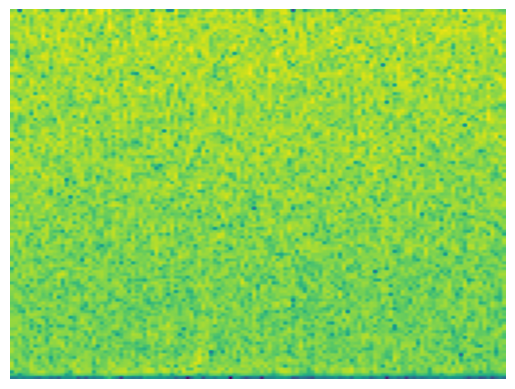

In [18]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 19
wvfrm = 
l =  1400  SNR =  15.816668295669306  m1 =  24  m2 =  19
30 14
wvfrm = 
l =  1400  SNR =  14.288737589851939  m1 =  30  m2 =  14
29 14
wvfrm = 
l =  1400  SNR =  14.058035706757234  m1 =  29  m2 =  14
22 12
wvfrm = 
l =  1400  SNR =  13.279568386168208  m1 =  22  m2 =  12
26 30
wvfrm = 
l =  1400  SNR =  21.186885064806088  m1 =  26  m2 =  30
14 25
wvfrm = 
l =  1400  SNR =  14.079083498251492  m1 =  14  m2 =  25
29 26
wvfrm = 
l =  1400  SNR =  20.435109494400884  m1 =  29  m2 =  26
10 15
wvfrm = 
l =  1400  SNR =  10.652626452697861  m1 =  10  m2 =  15
19 21
wvfrm = 
l =  1401  SNR =  14.625144785559474  m1 =  19  m2 =  21
18 11
wvfrm = 
l =  1401  SNR =  12.623105218998841  m1 =  18  m2 =  11
16 18
wvfrm = 
l =  1401  SNR =  14.735771329083336  m1 =  16  m2 =  18
11 18
wvfrm = 
l =  1401  SNR =  12.623105218998841  m1 =  11  m2 =  18
15 10
wvfrm = 
l =  1401  SNR =  7.487155521028777  m1 =  15  m2 =  10
13 21
wvfrm = 
l =  1402  SNR =  12.048722562420261  m1 =  13  m2

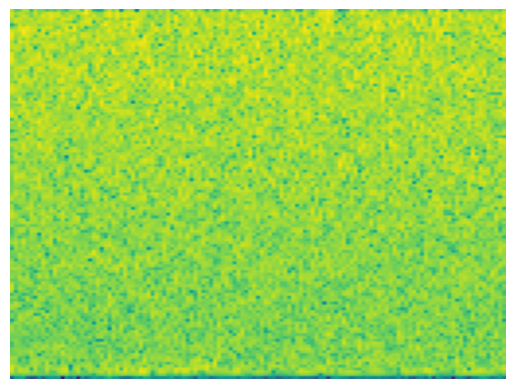

In [19]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    print("wvfrm = ")
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 1500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if (5 < snr_peak < 8) or (8 < snr_peak < 11):
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
